In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

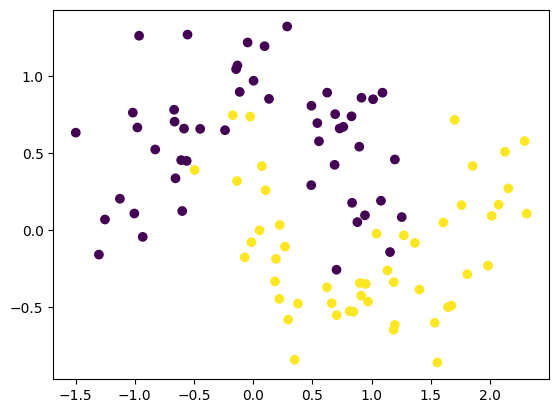

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 15s 2ms/step


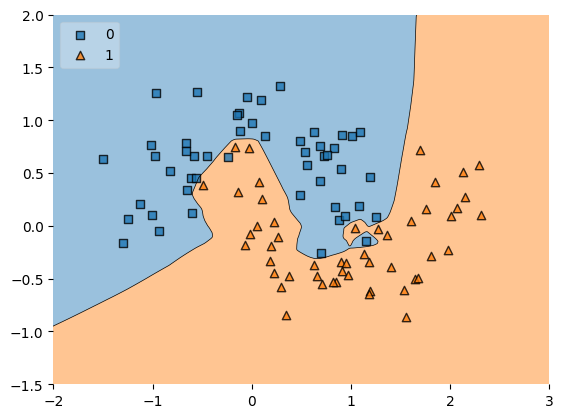

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

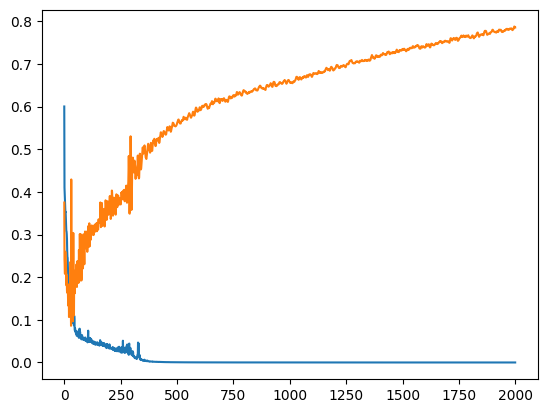

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 16s 2ms/step


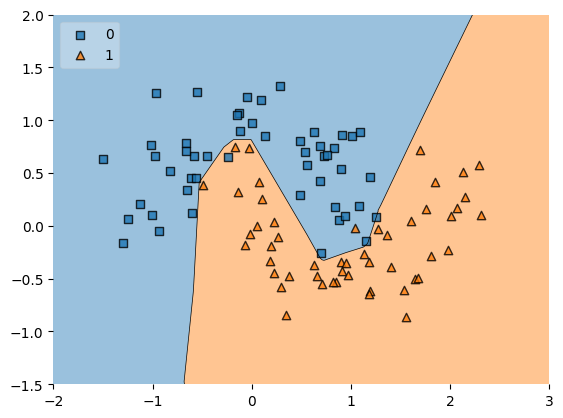

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

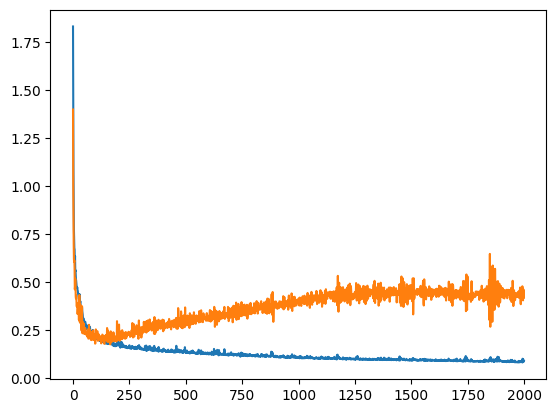

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [12]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

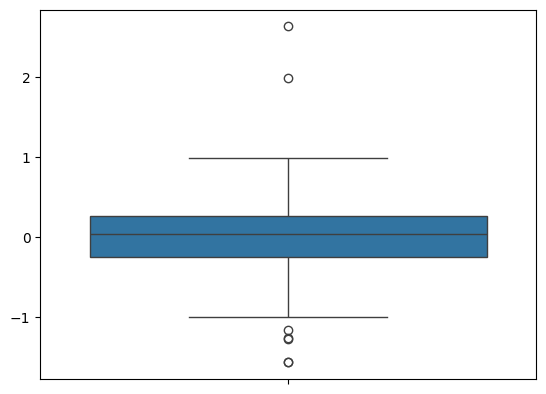

In [13]:
sns.boxplot(model1_weight_layer1)

<Axes: >

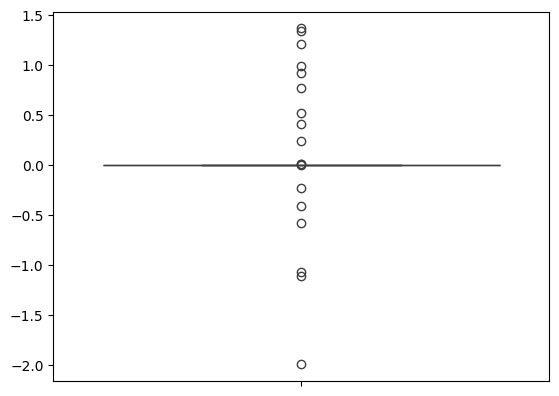

In [14]:
sns.boxplot(model2_weight_layer1)

In [15]:
model1_weight_layer1.min()

-1.5701612

In [16]:
model2_weight_layer1.min()

-1.9960488

<ipython-input-17-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-17-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

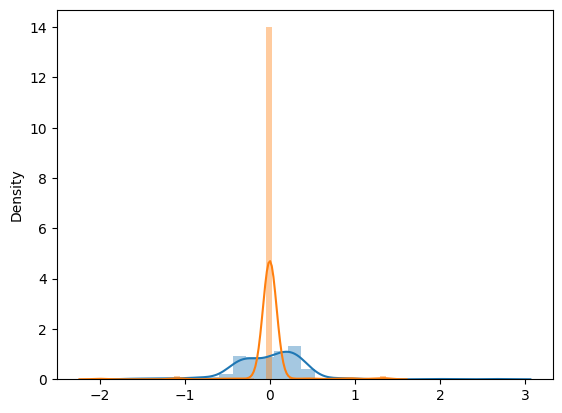

In [17]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [18]:
model1.get_weights()[0].reshape(256)

array([ 4.15556163e-01,  4.34930742e-01,  1.71797812e-01, -1.98623508e-01,
       -5.49030788e-02, -3.91019106e-01, -4.15551931e-01, -8.57835636e-02,
       -1.59984648e-01, -2.03832984e-01,  1.39106423e-01,  3.63161892e-01,
       -2.39307716e-01,  3.06986541e-01, -2.11785078e-01, -8.57421681e-02,
       -3.97789270e-01,  9.86567065e-02, -5.00580780e-02,  5.15870094e-01,
        8.51121619e-02, -3.84416550e-01,  3.63283098e-01, -2.67342478e-01,
       -8.33867583e-03,  3.51872861e-01, -1.89023122e-01, -3.88118923e-01,
        3.83124679e-01, -2.91873515e-02, -2.04810724e-01, -3.25211346e-01,
       -1.13600686e-01, -4.43569571e-01,  7.70798400e-02,  2.50471741e-01,
        3.56458247e-01, -4.00894642e-01,  8.05860087e-02,  1.24860585e-01,
       -4.71571267e-01, -3.03417772e-01, -1.70448616e-01, -1.84874937e-01,
        3.46196502e-01, -3.42828631e-01,  3.35153788e-01,  3.73326130e-02,
       -2.05467165e-01, -1.38218731e-01,  3.91905725e-01, -2.52313465e-01,
        3.94248694e-01, -